# NLTK Tool for Sentiment for Social Media



NLTK 3.0 http://www.nltk.org/api/nltk.sentiment.html

Specifically on Vader: https://github.com/cjhutto/vaderSentiment

In [2]:
import nltk
# Download the vader lexicons:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores("this movie is not very good but hey")

{'compound': -0.2051, 'neg': 0.206, 'neu': 0.794, 'pos': 0.0}

The compound is a sum of the scores that is then normalized to be between -1 and 1.  Negative means negative polarity.

In [7]:
sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
    "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
    "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
    "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
    "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
    "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
    "The book was good.",      # positive sentence
    "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
    "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
    "A really bad, horrible book.",    # negative sentence with booster words
    "At least it isn't a horrible book.", # negated negative sentence with contraction
    ":) and :D",     # emoticons handled
    "",        # an empty string is correctly handled
    "Today sux",     #  negative slang handled
    "Today sux!",    #  negative slang with punctuation emphasis handled
    "Today SUX!",    #  negative slang with capitalization emphasis
    "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
    ]

# with negation etc.
tricky_sentences = [
    "Most automated sentiment analysis tools are shit.",
    "VADER sentiment analysis is the shit.",
    "Sentiment analysis has never been good.",
    "Sentiment analysis with VADER has never been this good.",
    "Warren Beatty has never been so entertaining.",
    "I won't say that the movie is astounding and I wouldn't claim that \
    the movie is too banal either.",
    "I like to hate Michael Bay films, but I couldn't fault this one",
    "It's one thing to watch an Uwe Boll film, but another thing entirely \
    to pay for it",
    "The movie was too good",
    "This movie was actually neither that funny, nor super witty.",
    "This movie doesn't care about cleverness, wit or any other kind of \
    intelligent humor.",
    "Those who find ugly meanings in beautiful things are corrupt without \
    being charming.",
    "There are slow and repetitive parts, BUT it has just enough spice to \
    keep it interesting.",
    "The script is not fantastic, but the acting is decent and the cinematography \
    is EXCELLENT!",
    "Roger Dodger is one of the most compelling variations on this theme.",
    "Roger Dodger is one of the least compelling variations on this theme.",
    "Roger Dodger is at least compelling as a variation on the theme.",
    "they fall in love with the product",
    "but then it breaks",
    "usually around the time the 90 day warranty expires",
    "the twin towers collapsed today",
    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
    under orders and in the ''least offensive way possible.''"
    ]
sentences.extend(tricky_sentences)

In [9]:
# the analyser object is called sid here - 
sid = SentimentIntensityAnalyzer()

for sentence in sentences:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()
    print()

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 

VADER is smart, handsome, and funny!
compound: 0.8439, neg: 0.0, neu: 0.248, pos: 0.752, 

VADER is very smart, handsome, and funny.
compound: 0.8545, neg: 0.0, neu: 0.299, pos: 0.701, 

VADER is VERY SMART, handsome, and FUNNY.
compound: 0.9227, neg: 0.0, neu: 0.246, pos: 0.754, 

VADER is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, neg: 0.0, neu: 0.233, pos: 0.767, 

VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, neg: 0.0, neu: 0.294, pos: 0.706, 

The book was good.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 

The book was kind of good.
compound: 0.3832, neg: 0.0, neu: 0.657, pos: 0.343, 

The plot was good, but the characters are uncompelling and the dialog is not great.
compound: -0.7042, neg: 0.327, neu: 0.579, pos: 0.094, 

A really bad, horrible book.
compound: -0.8211, neg: 0.791, neu: 0.209, pos: 0.0, 

At least it isn't a horrible book

In [6]:
# using a paragraph - sent_tokenize and add to lines list
paragraph = "It was one of the worst movies I've seen, despite good reviews. \
    Unbelievably bad acting!! Poor direction. VERY poor production. \
    The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"

from nltk import tokenize
lines_list = tokenize.sent_tokenize(paragraph)

for sentence in lines_list:
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in sorted(ss):
         print('{0}: {1}, '.format(k, ss[k]), end='')
     print()

It was one of the worst movies I've seen, despite good reviews.
compound: -0.7584, neg: 0.394, neu: 0.606, pos: 0.0, 
Unbelievably bad acting!!
compound: -0.6572, neg: 0.686, neu: 0.314, pos: 0.0, 
Poor direction.
compound: -0.4767, neg: 0.756, neu: 0.244, pos: 0.0, 
VERY poor production.
compound: -0.6281, neg: 0.674, neu: 0.326, pos: 0.0, 
The movie was bad.
compound: -0.5423, neg: 0.538, neu: 0.462, pos: 0.0, 
Very bad movie.
compound: -0.5849, neg: 0.655, neu: 0.345, pos: 0.0, 
VERY bad movie.
compound: -0.6732, neg: 0.694, neu: 0.306, pos: 0.0, 
VERY BAD movie.
compound: -0.7398, neg: 0.724, neu: 0.276, pos: 0.0, 
VERY BAD movie!
compound: -0.7616, neg: 0.735, neu: 0.265, pos: 0.0, 


In [7]:
# a utility function to help
def get_vader_sentiment(sentence, analyzer):
    """ Pass in the setence to be analysed and the analyzer, e.g., sid.
    Returns a dictionary of the scores.
    """
    ss = analyzer.polarity_scores(sentence)
    return ss

In [8]:
sid = SentimentIntensityAnalyzer()
get_vader_sentiment("a terribly good movie!", sid)

{'compound': -0.2481, 'neg': 0.499, 'neu': 0.128, 'pos': 0.372}

## A Simple Model for a Simple Plot (without pandas)

If you are good with pandas, it's much nicer to use a dataframe and plot from that.

In [11]:
tweets = ["a good movie", "a bad movie", "a fun flick", "really awful", "don't waste your time", "what a romp"]

scores = []
for tweet in tweets:
    vaderscores = get_vader_sentiment(tweet, sid)
    scores.append(vaderscores['compound'])

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [43]:
# if we don't use a dataframe, we need to specify the X axis is just a number for the tweet or text
count = list(range(len(tweets)))
count

[0, 1, 2, 3, 4, 5]

In [51]:
avg = np.mean(scores)

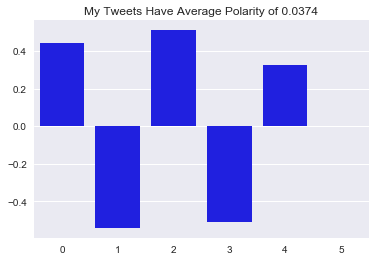

In [52]:
sns.barplot(x=count, y=scores, color="blue")
plt.title("My Tweets Have Average Polarity of " + str(avg))